# R-BoolNet: Random BN generation, loading with biolqm and minibn

This notebook shows how to use R BoolNet package from python notebooks to generate random Boolean networks, and load them either with `biolqm` or with `minibn`.

Two different methods are used: the first with a pure python approach; the second using Jupyter to mix both python and R code.

The documentation for BoolNet is available here: https://cran.r-project.org/web/packages/BoolNet/BoolNet.pdf

In [1]:
import biolqm
from colomoto import minibn

### Method 1: pure python interface

We use `rpy2` to provide an interface to the `BoolNet` R package:

In [2]:
from rpy2.robjects.packages import importr
boolnet = importr("BoolNet")

`boolnet` is a python object offering a bridge to the R package.
Then, BoolNet functions can be directly invoked as if `boolnet` was a python module:

In [3]:
net = boolnet.generateRandomNKNetwork(10, 10, topology="scale_free", gamma=2, 
                                      linkage="uniform", functionGeneration="uniform")

We save the network to a temporary file:

In [4]:
netfile = "/tmp/random.bnet"
boolnet.saveNetwork(net, netfile)
netfile

'/tmp/random.bnet'

We can directly load it with `minibn` and show its influence graph:

# computing graph layout...


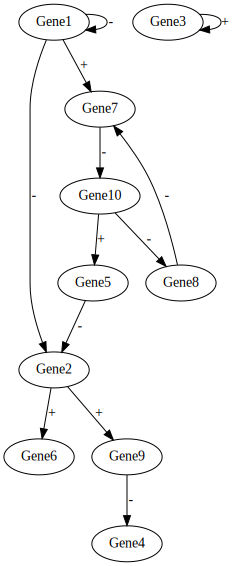

In [5]:
bn = minibn.BooleanNetwork.load(netfile)
bn.influence_graph()

... or with `biolqm` for further processing and translation to other analysis tools:

In [6]:
lqm = biolqm.load(netfile)
lqm

JavaObject id=o19

### Method 2: Mixing python and R in Jupyter notebooks

We first load the R extension offered by `rpy2`.

In [7]:
%load_ext rpy2.ipython

R commands should be prefixed with `%R`.

First, let us load the `BoolNet` package:

In [8]:
%R require(BoolNet)

array([1], dtype=int32)

Multiline R code can be written in cells starting with `%%R` line, with optional input and output variables to translate to/from python:

In [9]:
%%R -o netfiles
n <- generateRandomNKNetwork(n=10, k=10, topology="scale_free",
                             linkage="uniform", functionGeneration="uniform")
netfiles <- "/tmp/rn.bnet"
saveNetwork(n, netfiles)

Then, similarly to the first method:

In [10]:
bn = minibn.BooleanNetwork.load(netfiles[0])

and so on.